In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("user_app_data.csv")
print(df.shape)
df=df.drop_duplicates()

(300, 7)


In [21]:
df.shape 

(300, 7)

In [22]:
missing_data = df.isnull().sum()
print(missing_data)

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64


In [23]:
data_schema = {
    "user_id": int,
    "app_version": float,
    "platform": float,
    "session_duration": float,
    "number_of_sessions": int,
    "country": str,
    "user_feedback": int  # La puntuación del usuario se espera como un entero entre 1 y 5
}
def validate_and_correct_data(data, schema):
    corrected_data = {}
    for key, expected_type in schema.items():
        value = data.get(key)
        try:
            # Intentar convertir el valor al tipo esperado
            if expected_type == int:
                corrected_value = int(value)
            elif expected_type == float:
                corrected_value = float(value)
            elif expected_type == str:
                corrected_value = str(value)
            else:
                corrected_value = value  # Si no es un tipo conocido, dejar el valor original
            corrected_data[key] = corrected_value
        except (ValueError, TypeError):
            # Si no se puede convertir, asignar un valor predeterminado
            corrected_data[key] = expected_type()  # valor por defecto del tipo (0 para int, 0.0 para float, "" para str)
    
    # Asegurarse de que user_feedback esté entre 1 y 5
    if "user_feedback" in corrected_data:
        corrected_data["user_feedback"] = max(1, min(corrected_data["user_feedback"], 5))
    
    return corrected_data

# Aplicar la validación y corrección
corrected_data = validate_and_correct_data(df, data_schema)

# Imprimir los datos corregidos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB
None


In [24]:
# Obtener los nombres de las columnas del DataFrame
columnas_a_verificar = df.columns.tolist()  # Convertir a lista

for columna in columnas_a_verificar:
    # Extraemos los diferentes tipos de entradas de la columna
    unique_values = df[columna].unique().tolist()
    
    # Pongamos todos en minúsculas y sin espacios
    unique_values = [str(value).lower().replace(" ", "") for value in unique_values]
    
    # Verificar si hay elementos repetidos
    repetido = len(unique_values) > len(set(unique_values))
    
    # Imprimir el resultado
    print(f"¿Hay elementos repetidos en la columna '{columna}'? {repetido}") #Si es que se repite algun dato es porque hay alguno que está mal escrito

¿Hay elementos repetidos en la columna 'user_id'? False
¿Hay elementos repetidos en la columna 'app_version'? False
¿Hay elementos repetidos en la columna 'platform'? False
¿Hay elementos repetidos en la columna 'session_duration'? False
¿Hay elementos repetidos en la columna 'number_of_sessions'? False
¿Hay elementos repetidos en la columna 'country'? False
¿Hay elementos repetidos en la columna 'user_feedback'? False


In [25]:
# Diccionario de datos de ejemplo
data = {
    "user_id": 123,
    "app_version": 1.2,
    "platform": 2.0,
    "session_duration": 10000.0,  # valor inusualmente alto
    "number_of_sessions": 100,    # valor inusualmente alto
    "country": "USA",
    "user_feedback": 6            # fuera del rango de puntuación
}

# Función para limpiar datos inapropiados o inusuales
def clean_data(data):
    # Definir límites razonables para cada campo
    limits = {
        "session_duration": (0, 168),        # máximo 168 horas (1 semana)
        "number_of_sessions": (0, 50),       # máximo 50 sesiones en una semana
        "user_feedback": (1, 5)              # puntuación entre 1 y 5
    }

    # Aplicar límites
    for key, (min_val, max_val) in limits.items():
        if key in data:
            data[key] = max(min_val, min(data[key], max_val))

    return data

# Limpiar los datos
cleaned_data = clean_data(data)

# Imprimir los datos limpiados
print("Cleaned Data:", cleaned_data)


Cleaned Data: {'user_id': 123, 'app_version': 1.2, 'platform': 2.0, 'session_duration': 168, 'number_of_sessions': 50, 'country': 'USA', 'user_feedback': 5}


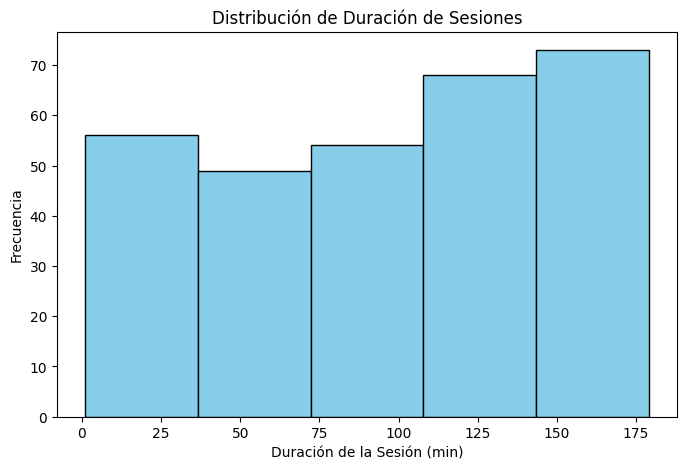

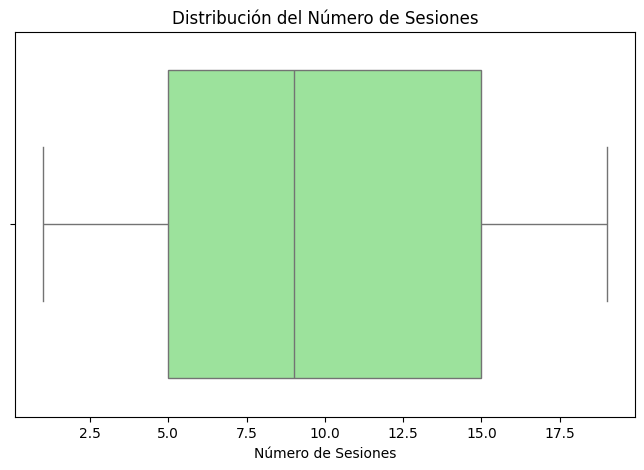

C:\Users\feded\AppData\Local\Temp\ipykernel_27988\3364835786.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='session_duration', data=df, ci=None, palette="pastel")
C:\Users\feded\AppData\Local\Temp\ipykernel_27988\3364835786.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='session_duration', data=df, ci=None, palette="pastel")


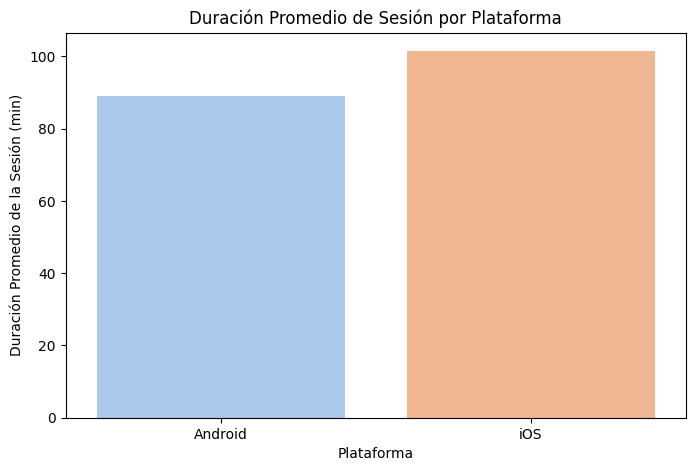

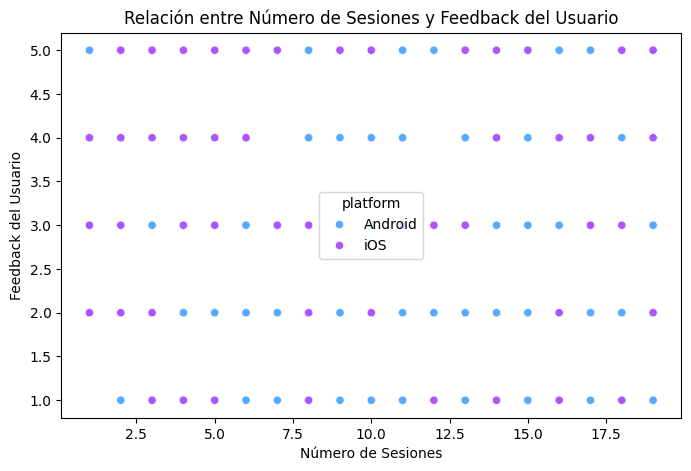

In [27]:
# ----- Visualizaciones Univariantes -----

# 1. Histograma - Distribución de la duración de las sesiones
plt.figure(figsize=(8, 5))
plt.hist(df['session_duration'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribución de Duración de Sesiones")
plt.xlabel("Duración de la Sesión (min)")
plt.ylabel("Frecuencia")
plt.show()

# Interpretación: La mayoría de las sesiones duran entre 50 y 120 minutos, con algunas sesiones extendiéndose más allá de los 120 minutos.

# 2. Boxplot - Distribución del número de sesiones
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['number_of_sessions'], color='lightgreen')
plt.title("Distribución del Número de Sesiones")
plt.xlabel("Número de Sesiones")
plt.show()

# Interpretación: La mayoría de los usuarios tienen entre 5 y 15 sesiones, y no se observan valores atípicos extremos en el número de sesiones.

# ----- Visualizaciones Multivariantes -----

# 1. Gráfico de barras - Promedio de duración de sesión por plataforma
plt.figure(figsize=(8, 5))
sns.barplot(x='platform', y='session_duration', data=df, ci=None, palette="pastel")
plt.title("Duración Promedio de Sesión por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Duración Promedio de la Sesión (min)")
plt.show()

# Interpretación: Los usuarios de Android parecen tener sesiones un poco más largas en promedio que los usuarios de iOS.

# 2. Gráfico de dispersión - Relación entre número de sesiones y feedback del usuario
plt.figure(figsize=(8, 5))
sns.scatterplot(x='number_of_sessions', y='user_feedback', data=df, hue='platform', palette="cool")
plt.title("Relación entre Número de Sesiones y Feedback del Usuario")
plt.xlabel("Número de Sesiones")
plt.ylabel("Feedback del Usuario")
plt.show()

# Interpretación: No parece haber una fuerte correlación entre el número de sesiones y el feedback del usuario, aunque los usuarios con más sesiones tienden a dejar un feedback más positivo.